## 💻 Modelo de Classificação

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("marketing_investimento.csv")

In [3]:
df

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


 📊 **Exploração de categoria**

 ---

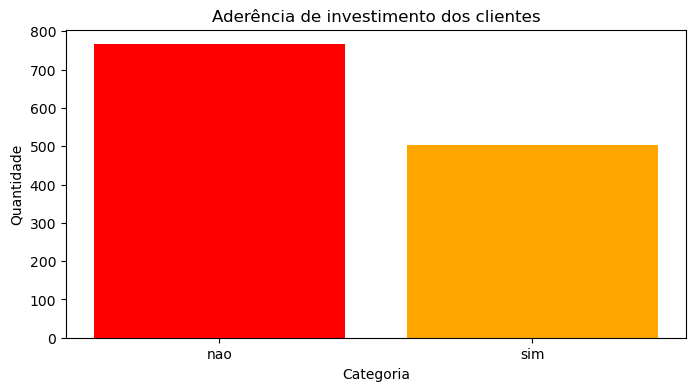

In [5]:
##  Aderência de investimento é nosso variavel target

qtd_aderencia= df['aderencia_investimento'].value_counts()

bar_colors = ['red','orange']

plt.figure(figsize=(8,4))
plt.bar(qtd_aderencia.index, qtd_aderencia.values, color=bar_colors)
plt.title("Aderência de investimento dos clientes")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.show()

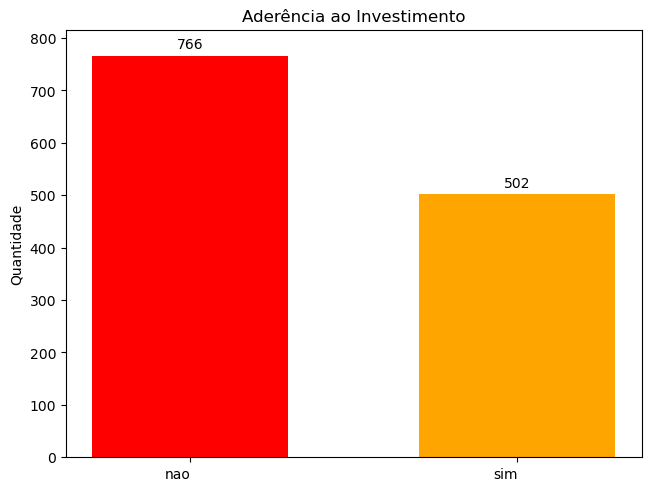

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Conta os valores únicos
qtd_aderencia = df['aderencia_investimento'].value_counts()

cores = ['red','orange']

# Eixo X: índices (categorias)
x = np.arange(len(qtd_aderencia.index))
lagura = 0.6  # largura da barra

fig, ax = plt.subplots(layout='constrained')

# Cria o gráfico de barras
grafico = ax.bar(x, qtd_aderencia.values, lagura, color=cores)

# Adiciona os rótulos nas barras
ax.bar_label(grafico, padding=3)

# Títulos e eixos
ax.set_ylabel('Quantidade')
ax.set_title('Aderência ao Investimento')
ax.set_xticks(x)
ax.set_xticklabels(qtd_aderencia.index, ha='right')
ax.set_ylim(0, qtd_aderencia.max() + 50)  # margem superior

plt.show()


In [10]:
qtd_aderencia_civil = (
    df.groupby(['escolaridade'])['aderencia_investimento']
        .value_counts()
        .to_frame(name='quantidade')
        .reset_index()
)

fig = px.bar(
    qtd_aderencia_civil,
    x='escolaridade',
    y='quantidade',
    color='aderencia_investimento',
    barmode='group',
    title='Aderência ao Investimento por Escolaridade'
)

fig.show()

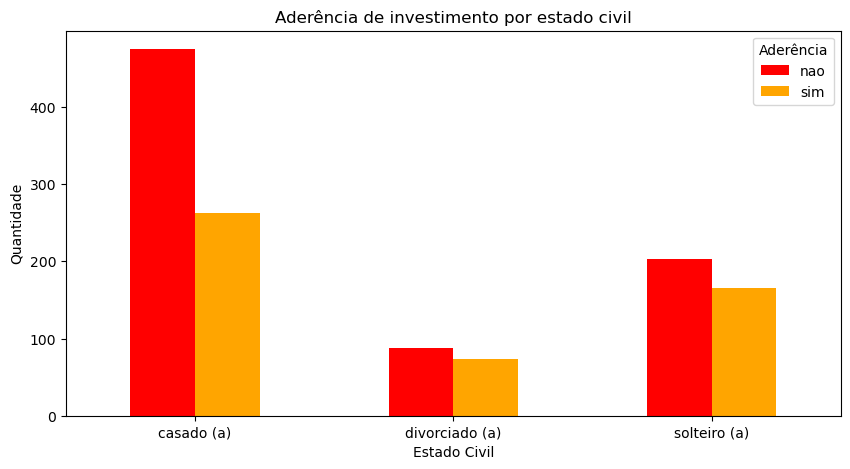

In [ ]:
qtd_inadimplencia = (
    df.groupby(['inadimplencia'])['aderencia_investimento']
        .value_counts()
        .to_frame(name='quantidade')
        .reset_index()
)

fig = px.bar(
    qtd_inadimplencia
    x='escolaridade',
    y='quantidade',
    color='aderencia_investimento',
    barmode='group',
    title='Aderência ao Investimento por inadimplencia'
)

fig.show()
